In [2]:
from utils import *
from terminal_models import FeedforwardUnicycle
from feedforward_network import FeedForwardNet
import torch
import matplotlib.pyplot as plt


In [3]:
net0 = torch.load('./nets3/net0.pth')
net1 = torch.load('./nets3/net1.pth')
net2 = torch.load('./nets3/net2.pth')
net3 = torch.load('./nets3/net3.pth')
net4 = torch.load('./nets3/net4.pth')
net5 = torch.load('./nets3/net5.pth')
net6 = torch.load('./nets3/net6.pth')
net7 = torch.load('./nets3/net7.pth')
net8 = torch.load('./nets3/net8.pth')
net9 = torch.load('./nets3/net9.pth')
net10 = torch.load('./nets3/net10.pth')

net11 = torch.load('./nets3/net11.pth')
net12 = torch.load('./nets3/net12.pth')
net13 = torch.load('./nets3/net13.pth')
net14 = torch.load('./nets3/net14.pth')
net15 = torch.load('./nets3/net15.pth')
net16 = torch.load('./nets3/net16.pth')
net17 = torch.load('./nets3/net17.pth')
net18 = torch.load('./nets3/net18.pth')
net19 = torch.load('./nets3/net19.pth')


In [4]:
nets = [net0, net1, net2, net3, net4, 
      net5,net6, net7, net8,
      net9, net10, net11,net12, net13, net14, 
      net15,net16, net17, net18,
      net19]

In [5]:
data = grid_data(size = 1, xy_limits=[-1, 1], theta_lims=[-1, 1])

In [6]:
terminal_uni = FeedforwardUnicycle(net19)
states, v19 = statesValues(init_positions=data, terminal_model=terminal_uni, as_tensor=True)
            

In [7]:
errors = []

with torch.no_grad():
    p0 = net0(states).detach().numpy().reshape(-1, 1)
    p1 = net1(states).detach().numpy().reshape(-1, 1)
    p2 = net2(states).detach().numpy().reshape(-1, 1)
    p3 = net3(states).detach().numpy().reshape(-1, 1)
    p4 = net4(states).detach().numpy().reshape(-1, 1)
    p5 = net5(states).detach().numpy().reshape(-1, 1)
    p6 = net6(states).detach().numpy().reshape(-1, 1)
    p7 = net7(states).detach().numpy().reshape(-1, 1)
    p8 = net8(states).detach().numpy().reshape(-1, 1)
    p9 = net9(states).detach().numpy().reshape(-1, 1)
    p10 = net10(states).detach().numpy().reshape(-1, 1)
    
    p11 = net11(states).detach().numpy().reshape(-1, 1)
    p12 = net12(states).detach().numpy().reshape(-1, 1)
    p13 = net13(states).detach().numpy().reshape(-1, 1)
    p14 = net14(states).detach().numpy().reshape(-1, 1)
    p15 = net15(states).detach().numpy().reshape(-1, 1)
    p16 = net16(states).detach().numpy().reshape(-1, 1)
    p17 = net17(states).detach().numpy().reshape(-1, 1)
    p18 = net18(states).detach().numpy().reshape(-1, 1)
    p19 = net19(states).detach().numpy().reshape(-1, 1)

In [8]:
v19 = v19.detach().numpy().reshape(-1,1)

errors.append(np.abs(np.mean(v19 - p0)))
errors.append(np.abs(np.mean(v19 - p1)))
errors.append(np.abs(np.mean(v19 - p2)))
errors.append(np.abs(np.mean(v19 - p3)))
errors.append(np.abs(np.mean(v19 - p4)))
errors.append(np.abs(np.mean(v19 - p5)))
errors.append(np.abs(np.mean(v19 - p6)))
errors.append(np.abs(np.mean(v19 - p7)))
errors.append(np.abs(np.mean(v19 - p8)))
errors.append(np.abs(np.mean(v19 - p9)))
errors.append(np.abs(np.mean(v19 - p10)))

              
    
errors.append(np.abs(np.mean(v19 - p11)))
errors.append(np.abs(np.mean(v19 - p12)))
errors.append(np.abs(np.mean(v19 - p13)))
errors.append(np.abs(np.mean(v19 - p14)))
errors.append(np.abs(np.mean(v19 - p15)))
errors.append(np.abs(np.mean(v19 - p16)))
errors.append(np.abs(np.mean(v19 - p17)))
errors.append(np.abs(np.mean(v19 - p18)))
errors.append(np.abs(np.mean(v19 - p19)))

<Figure size 432x288 with 0 Axes>

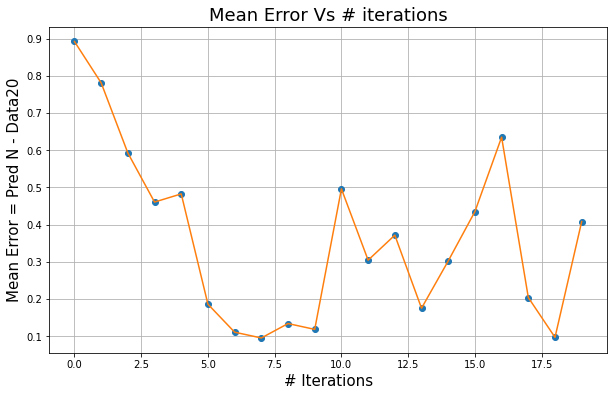

In [9]:

plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(errors, "o",)
plt.plot(errors)
plt.xlabel("# Iterations", fontsize = 15)
plt.ylabel("Mean Error = Pred N - Data20", fontsize = 15)
plt.grid()
plt.title("Mean Error Vs # iterations", fontsize=18)
plt.savefig("predN_data20.png")

In [40]:
# Plot stopping criteria vv iters


model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T
x0 = np.array([.5, .5, 0.])
T  = 30
problem = crocoddyl.ShootingProblem(x0, [ model ] * T, model)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.solve([], [], 1000)

c_log = log.stops[1:]



t1 = FeedforwardUnicycle(net1)
t2 = FeedforwardUnicycle(net2)
t3 = FeedforwardUnicycle(net3)
t4 = FeedforwardUnicycle(net4)
t5 = FeedforwardUnicycle(net5)
t6 = FeedforwardUnicycle(net6)
t7 = FeedforwardUnicycle(net7)
t8 = FeedforwardUnicycle(net8)
t9 = FeedforwardUnicycle(net9)
#t10 = FeedforwardUnicycle(net11)


In [41]:
t0 = FeedforwardUnicycle(net0)
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T
T  = 30
problem = crocoddyl.ShootingProblem(x0.T, [ model ] * T, t0)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.th_stop = 1e-6
ddp.solve([], [], 1000)
log0 = log.stops[1:]
    

t9 = FeedforwardUnicycle(net9)
model = crocoddyl.ActionModelUnicycle()
model.costWeights = np.array([1,1.]).T
T  = 30
problem = crocoddyl.ShootingProblem(x0.T, [ model ] * T, t0)
ddp = crocoddyl.SolverDDP(problem)
log = crocoddyl.CallbackLogger()
ddp.setCallbacks([log,
                  crocoddyl.CallbackVerbose()])
ddp.th_stop = 1e-6
ddp.solve([], [], 1000)
log9 = log.stops[1:]
    
    
    
    

In [42]:
#log0 = logs(t0)
#log1 = logs(t1)
#log2 = logs(t2)
#log3 = logs(t3)
#log4 = logs(t4)
#log5 = logs(t5)
#log6 = logs(t6)
#log7 = logs(t7)
#log8 = logs(t8)
log9 = logs(t9)
#log10 = logs(t10)

25.320274467703907


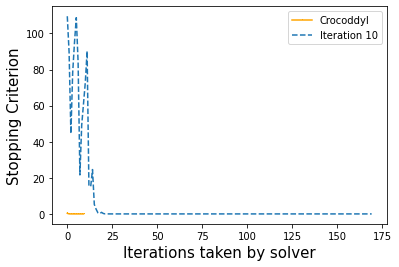

In [43]:
plt.clf()
plt.plot(c_log, c ='orange',marker =",", label = "Crocoddyl")
#plt.plot(log0, '--r', label = "i")
#plt.plot(log1, '--y')
#plt.plot(log2, '--b')
#plt.plot(log3, c='orange')
#plt.plot(log4, 'grey')
#plt.plot(log5)
#plt.plot(log6)
#plt.plot(log7, '--o')
#plt.plot(log8, '--r')
plt.plot(log9, '--', label = "Iteration 10")
plt.ylabel("Stopping Criterion", fontsize = 15)
plt.xlabel("Iterations taken by solver", fontsize = 15)
#plt.xticks(np.arange(0, 32, step=4))
#plt.yticks(np.arange(0, 70, step=10))
plt.legend()
#plt.savefig("Stop.png")
plt.show()


In [14]:
ddp.cost

23.965247363604885

In [15]:
ddp.iter

37